<a href="https://colab.research.google.com/github/Firay24/Jointscamp/blob/main/Kelompok_4_%7C_DS_Joints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Kelompok 4: Data Science Joints Camp 2021</h1>

*   Zuhal 'Alimul Hadi
*   Fira Yusi
*   [Michael Abraham Chan Tulenan](https://www.linkedin.com/in/michael-act/)


#<center><h1>-- Gambaran --</h1></center>

Bisnis apa pun ingin memaksimalkan jumlah pelanggan. Untuk mencapai tujuan ini, penting juga untuk tidak hanya mencoba menarik pelanggan yang baru, tetapi juga mempertahankan yang sudah ada. 

Dengan memprediksi churn, kita dapat mengambil aksi tepat waktu dan mencoba mempertahankan klien yang ingin keluar. Berdasarkan data tentang layanan yang digunakan oleh klien, kita dapat mencoba memberinya penawaran khusus, intinya mencoba mengubah keputusannya untuk keluar dari operator. 

Kita diberikan dataset oleh perusahaan telekomunikasi. Data tersebut berisi informasi tentang hampir 6000 pengguna, karakteristik mereka, layanan yang mereka gunakan, durasi penggunaan layanan operator, metode pembayaran, jumlah pembayaran dan banyak lagi.

Tugasnya adalah menganalisis data dan memprediksi churn pengguna (untuk mengidentifikasi orang yang **akan** dan **tidak akan** melanjutkan layanan mereka). Pekerjaan harus mencakup poin wajib berikut:

*   Deskripsi data (dengan perhitungan statistik dasar);
*   Penelitian ketergantungan dan perumusan hipotesis;
*   Membangun model untuk memprediksi arus keluar (dengan justifikasi untuk pilihan model tertentu) berdasarkan hipotesis yang diuji dan hubungan yang teridentifikasi;
*   Perbandingan kualitas model yang diperoleh.

Sumber: [Telecom users dataset | Kaggle](https://www.kaggle.com/radmirzosimov/telecom-users-dataset)

🟢 Goal:
> Melakukan prediksi untuk pelanggan yang **akan** dan **tidak akan** melanjutkan pembayaran layanan mereka.

🧐 Apa yang akan kami lakukan hari ini?
*    Memuat dataset tentang **Informasi Pelanggan bertahan dan tidak dari Perusahaan Telekomunikasi.**
*    Data Cleaning
    *    Menghapus kolom yang kurang penting untuk analisa data.
    *    Mengubah kolom `TotalCharges` menjadi numerik.
    *    Mengubah nilai kolom `SeniorCitizen` dan `Churn` menjadi kategori *Yes* atau *No*.
*    Data Analysis & Visualization
    *    Melihat banyaknya baris dan kolom
    *    Melihat statistik deskriptif dasar
    *    Melihat perbandingan data *Churn* *Yes* dan *No*. (VIZ)
    *    Melihat penurunan pemasukan bulanan jika *Churn* terjadi. (VIZ)
    *    Melihat perbandingan gender Laki-laki dan Perempuan yang *Churn*. (VIZ)
    *    Melihat perbandingan data pelanggan belum menikah dan sudah menikah yang *Churn*. (VIZ)
    *    Membuat level kewaspadaan pelanggan yang akan Churn berdasarkan lamanya waktu pelanggan menjalani kontrak dengan perusahaan. (VIZ)
    *    Melihat metode pembayaran yang sering menyumbang pelanggan Churn. (VIZ)
    *    Melihat kontribusi pemasukan bulanan yang di berikan oleh tiap-tiap metode pembayaran.
    *    Melihat lamanya pelanggan bertahan berdasarkan metode pembayaran. (VIZ)
    *    Melihat korelasi antar kolom numerik. (VIZ)
*   Data Pre-Processing
    *    Mengubah kolom kategorik dengan 2 pembanding nilai menjadi *Binary Classification*.
    *    Melihat kembali korelasi antar kolom. (VIZ)
    *    Melakukan One Hot Encoding.
    *    Menyeleksi kolom yang relevan untuk di latih / *training*.
    *    Me-Normalisasi data dengan *MinMaxScaler*.
*   Modelling
    *    Menggunakan GridSearchCV untuk menemukan parameter terbaik dalam *algoritma modelling*.
    *    Melakukan perbandingan model berdasarkan output `classification_report`.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data Loading

In [ ]:
df = pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Tentang Kolom:
*    gender - jenis kelamin klien (male / female)
*    SeniorCitizen - sudah pensiun? (1, 0)
*    Partner - sudah menikah (Yes, No)
*    tenure - berapa lama (bulan) orang ini telah menjadi klien
*    PhoneService - menggunakan layanan telepon? (Yes, No)
*    MultipleLines - memiliki beberapa saluran telepon? (Yes, No, No phone service)
*    InternetService - layanan internet (DSL, Fiber optic, No)
*    OnlineSecurity - menggunakan layanan keamanan internet khusus? (Yes, No, No internet service)
*    OnlineBackup - menggunakan layanan backup? (Yes, No, No internet service)
*    DeviceProtection - mempunyai peralatan backup? (Yes, No, No internet service)
*    TechSupport - terhubung ke layanan bantuan melalui telepon? (Yes, No, No internet service)
*    StreamingTV - menggunakan layanan streaming TV? (Yes, No, No internet service)
*    StreamingMovies - menggunakan layanan streaming movie? (Yes, No, No internet service)
*    Contract - tipe kontrak klien (Month-to-month, One year, Two year)
*    PaperlessBilling - klien menggunakan pembayaran dengan kertas? (Yes, No)
*    PaymentMethod - metode pembayaran (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*    MonthlyCharges - banyaknya pembayaran tiap bulan
*    TotalCharges - total banyaknya pembayaran yang sudah dilakukan
*    Churn - apakah pelanggan ini tidak bertahan atau tidak? (Yes or No)

Kesan / Pertanyaan pertama saat melihat data:
*    Data ini berasal dari setiap pelanggan yang berbeda-beda.
*    Terdapat nilai `No internet service`, apakah itu?
*    Kolom `TotalCharges` merupakan hasil perkalian dari `MonthlyCharges` dan `tenure`.

# Data Cleaning

Kolom `Unnamed: 0` dan `customerID` hanya sebagai penanda ID. Pandas sudah menyiapkan built in ID, jadi kami bisa hapus saja kolom tersebut. Selain itu, tidak ada pengaruh dalam proses analisis data jika kolom tersebut dihapus juga.

In [ ]:
df.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)

Kami tidak menemukan nilai `Null` dalam data ini.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


Loh, kenapa TotalCharges bertipe data `object`, bukankah itu seharusnya bertipe data `float`? Teryata itu karena adanya nilai ` ` (spasi).

In [ ]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Kami memutuskan untuk mengubah nilai spasi tersebut menjadi 0. Karena kami melihat nilai `tenure` pada seluruh baris diatas merupakan 0 dan tidak `Churn`. Berarti ada kemungkinan mereka baru pelanggan pertama, jadi belom mengeluarkan biaya resmi pembayaran.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

Memastikan fitur `InternetService` yang memiliki value `No` mempengaruhi ke-6 atribut setelahnya yang memiliki value `No internet service`. Ini untuk menjawab pertanyaan yang sebelumnya kami pertanyakan diawal. Ternyata jika itu adalah kolom `InternetService` nya bernilai `No`, layanan tambahan setelahnya juga tidak terpakai. 

Lalu kenapa mereka tetap menjadi pelanggan di perusahaan telekomunikasi ini? Karena ada kemungkinan mereka menggunakan layanan telepon (`PhoneService`) walaupun tidak menggunakan layanan internet.

In [ ]:
newdf = df.copy()
newdf = newdf.to_numpy()
error = 0

for value in newdf:
  if value[7] == 'No':
    if value[8] != 'No internet service':
      error += 1

if error == 0:
  print(True, 'Berarti asumsi kami benar.')
  intColumn = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
  df[intColumn] = df[intColumn].replace({'No internet service': 'No'})
else:
  print(False)


True Berarti asumsi kami benar.


Memastikan fitur `PhoneService` yang memiliki nilai `No` mempengaruhi atribut setelahnya yang memiliki nilai `No phone service`. Masih sama seperti proses sebelumnya, ternyata pada kolom `MultipleLines` kami menemukan adanya nilai `No phone service`, dimana nilai tersebut bisa terjadi karena kolom `PhoneService` yang `No`. 

In [ ]:
newdf = df.copy()
newdf = newdf.to_numpy()
error = 0

for value in newdf:
  if value[5] == 'No':
    if value[6] != 'No phone service':
      error += 1

if error == 0:
  print(True, 'Berarti asumsi kami benar.')
  df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
else:
  print(False)

True Berarti asumsi kami benar.


Dibanding menggunakan numerik (1 dan 0) untuk membedakan `Yes` atau `No`, baiknya langsung menggunakan `Yes` `No` saja. Loh bukankah lebih baik menggunakan 0 dan 1 saja? Ya, itu baik untuk `modelling` namun tidak baik untuk menunjukkan informasi yang kami dapat dari data.

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

In [ ]:
df.head(10).style.format({"MonthlyCharges": "${:20,.0f}", 
                          "TotalCharges": "${:20,.0f}"})

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,Yes,Yes,72,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),$ 24,"$ 1,735",No
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$ 88,"$ 3,973",No
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),$ 75,"$ 2,870",Yes
3,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,$ 56,$ 238,No
4,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,$ 53,$ 120,No
5,Female,No,Yes,No,70,No,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),$ 50,"$ 3,370",No
6,Female,No,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,$ 91,"$ 2,990",No
7,Female,No,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,$ 25,$ 25,No
8,Male,No,No,No,39,No,No,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,$ 36,"$ 1,309",No
9,Male,Yes,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,$ 116,"$ 6,383",No


In [ ]:
df.duplicated().sum()

16

Pada akhirnya kami tidak menghapus data-data yang duplikat, karena kami tahu ini berasal dari pelanggan yang berbeda-beda, tentunya punya keunikan tersendiri walaupun terkadang sama dengan pelanggan lainnya.

# Data Analysis and Visualization

Melihat banyaknya kolom dan baris, karena di bagian `Data Cleaning` terdapat kolom yang dihapus yaitu `unnamed: 0` dan `customerID`

In [ ]:
nColumnRow = df.shape
print(nColumnRow)

(5986, 20)


Melihat statistik deskriptif dari atribut-atribut yang tipe data `numerik (float/int)`

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


In [ ]:
# Menentukan palet warna yang digunakan untuk membedakan Churn Yes dan No
palette = {"No": "#3a6351", "Yes": "#be0000"}

<h3> Churn (Target Prediksi) --> Kolom Kategorik </h3>

In [ ]:
cntChurn = df['Churn'].value_counts()

fig = go.Figure()
fig.add_pie(labels=cntChurn.index, values=cntChurn.values, marker={'colors': list(palette.values())})
fig.update_layout(title='Frequency of Churn', width=768, height=512)
fig.update_traces(titlefont_size=20, textfont_size=16, marker=dict(line=dict(color='#000000', width=1)))
fig.show()

Dalam data ini perbandingan data yang sudah terjadi `Churn` kurang lebih 26.5%, sedangkan 73.5% lainnya merupakan data yang tidak terjadi `Churn`. Kami akan pertimbangkan menggunakan SMOTE pada bagian Pre-Processing nanti.

<h3> MonthlyCharges --> Kolom Numerik </h3>

Total pemasukan bulanan jika churn tidak terjadi: $216753.59999999998
Total pemasukan bulanan yang berkurang jika churn terjadi: $101443.15
Total pemasukan bulanan saat churn terjadi: $115310.44999999998


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



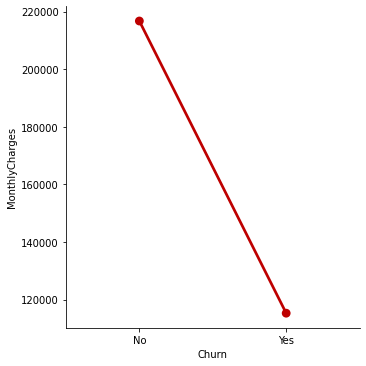

In [ ]:
totalMonthly = df[df['Contract'] == 'Month-to-month']['MonthlyCharges'].sum()

afChurn = df[(df['Churn'] == 'Yes') & (df['Contract'] == 'Month-to-month')][['MonthlyCharges', 'Churn']]
# Mendapatkan selisih antara total seluruhnya dengan total bulanan Churn 1
afChurn = afChurn.groupby(by='Churn').sum()
afChurn = totalMonthly - afChurn
afChurn.reset_index(inplace=True)

# Menggabungkan baris dari total seluruhnya dengan total bulanan Churn 1
allChurnMonthly = pd.DataFrame({'Churn': 'No', 'MonthlyCharges': totalMonthly.flatten()})
allChurnMonthly = pd.concat([allChurnMonthly, afChurn], axis=0)

monthlyChurn = df[(df['Contract'] == 'Month-to-month') & (df['Churn'] == 'Yes')]['MonthlyCharges'].sum()
print(f'Total pemasukan bulanan jika churn tidak terjadi: ${totalMonthly}')
print(f'Total pemasukan bulanan yang berkurang jika churn terjadi: ${monthlyChurn}')
print(f'Total pemasukan bulanan saat churn terjadi: ${totalMonthly - monthlyChurn}')
# Memvisualisasikan penurunan pemasukan bulanan ketika Churn terjadi
sns.factorplot(x='Churn', y='MonthlyCharges', data=allChurnMonthly, color='#be0000')
plt.show()

Sebelum kita masuk lebih jauh mengetahui kenapa bisa terjadi Churn. Mari kita lihat pemasukan perusahaan yang berkurang bila terjadinya Churn. **Pemasukan bulanan berkurang sebanyak 46.8%**, atau setengah dari sebelum terjadinya Churn. Hal itu bisa memberikan dampak yang besar bagi perusahaan.

<h3> Gender --> Kolom Kategorik </h3>

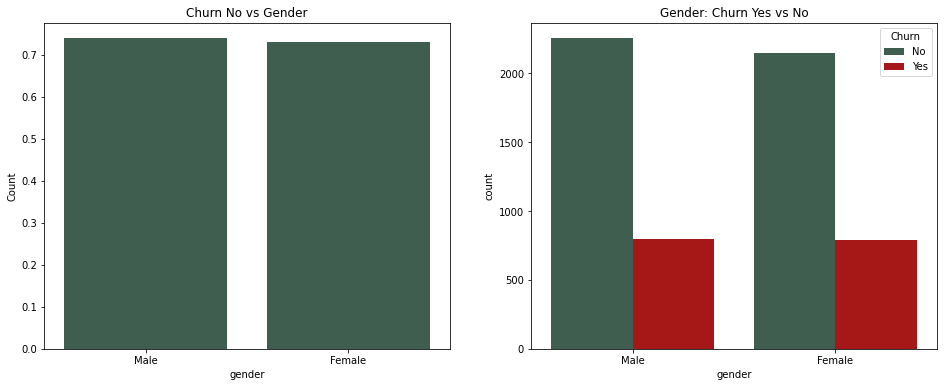

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

cnt0Churn = df[['gender', 'Churn']].replace({'Yes': 1, 'No': 0})
cnt0Churn = 1 - cnt0Churn.groupby(by='gender').mean()
cnt0Churn = cnt0Churn.iloc[::-1]
sns.barplot(x=cnt0Churn.index, y='Churn', data=cnt0Churn, color='#3a6351', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Churn No vs Gender')

sns.countplot(x='gender', hue='Churn', data=df, palette=palette, ax=ax2)
ax2.set_title('Gender: Churn Yes vs No')
plt.show()

Gender tidak banyak mempengaruhi seseorang akan Churn atau tidak. Keseimbangan antara **gender yang Churn dan Tidak Churn itu seimbang**. Bahkan di barplot sebelah kanan untuk perempuan dan laki-laki yang Churn benar-benar terlihat satu garis lurus. 

<h3> Partner --> Kolom Kategorik </h3>

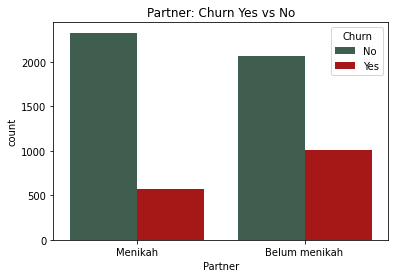

In [ ]:
fig = sns.countplot(x='Partner', hue='Churn', data=df, palette=palette)
fig.set_xticklabels(['Menikah', 'Belum menikah'])
fig.set_title('Partner: Churn Yes vs No')
plt.show()

Seseorang menikah dan tidak, bisa dibilang mempengaruhi orang tersebut akan Churn atau tidaknya. Setengah dari orang yang belum menikah adalah orang-orang yang sudah tidak melanjutkan kontrak layanan dengan perusahaan. Sedangkan orang-orang yang belum menikah masih banyak yang melanjutkan kontrak layanan perusahaan.

<h3> Tenure --> Kolom Berkelanjutan </h3>

In [ ]:
print('Lama pelanggan yang paling lama adalah:', df['tenure'].max(), 'bulan.')
print('Lama pelanggan yang paling baru adalah:', df['tenure'].min(), 'bulan.')
print('Rata-rata lamanya pelanggan adalah:', df['tenure'].mean(), 'bulan.')

Lama pelanggan yang paling lama adalah: 72 bulan.
Lama pelanggan yang paling baru adalah: 0 bulan.
Rata-rata lamanya pelanggan adalah: 32.46876044102907 bulan.


Wow, rata-rata pelanggan di perusahaan ini sudah berlangganan selama 32 bulan atau 3 tahun kurang 4 bulan. 

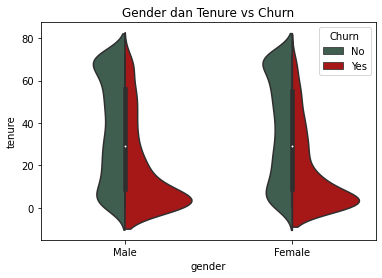

In [ ]:
fig = sns.violinplot(x="gender", y="tenure", hue="Churn", data=df, palette=palette, split=True)
fig.set_title('Gender dan Tenure vs Churn')
plt.show()

Walaupun rata-rata lama pelanggan adalah 32 bulan, pelanggan yang pergi di bulan tersebut tidak banyak. Justru **bulan 0-20 (1 Tahun Lebih 8 bulan) merupakan zona-zona kewaspadaan** perusahaan terhadap pelanggan di bulan tersebut. Baik itu perempuan atau laki-laki, harus di perlakukan kewaspadaan yang sama.

Kita bisa bagi beberapa level kewaspadaan (berdasarkan standar deviasi):
*   Level A = 0 - 24
*   Level B = 25 - 48
*   Level C = 49 - 72

<h3> PaymentMethod --> Kolom Kategorik </h3>

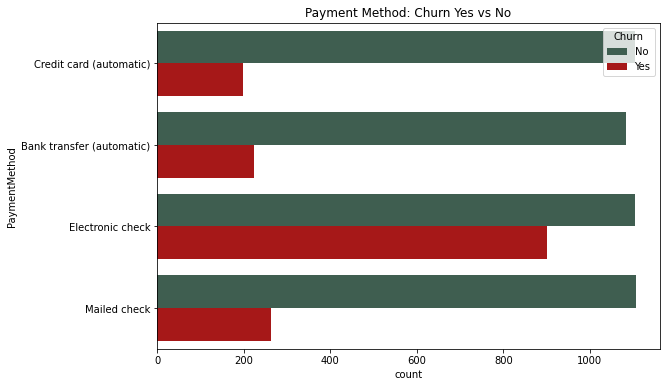

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(y='PaymentMethod', hue='Churn', palette=palette, data=df, ax=ax)
ax.set_title('Payment Method: Churn Yes vs No')
plt.show()

Layanan Cek Elektronik menyumbang pelanggan yang `Churn` paling banyak dibanding yang lain. 

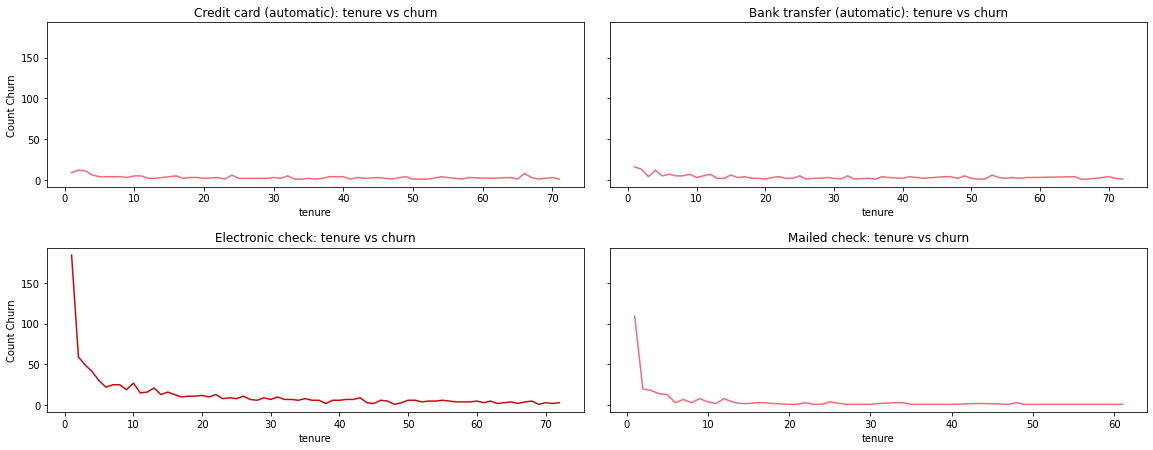

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 6), sharey=True)
ax = ax.flatten()
fig.tight_layout(h_pad=4)

colors = {'Credit card (automatic)': '#f56a79', 'Bank transfer (automatic)': '#f56a79', 
          'Electronic check': '#cd0a0a', 'Mailed check': '#f56a79'}
for id, payMeth in enumerate(df['PaymentMethod'].unique()):
    tenureChurn = df[(df['Churn'] == 'Yes') & (df['PaymentMethod'] == payMeth)][['tenure', 'Churn']].groupby(by='tenure').count()
    sns.lineplot(x='tenure', y='Churn', color=colors[payMeth], data=tenureChurn, ax=ax[id])
    ax[id].set_ylabel('Count Churn')
    ax[id].set_title(f'{payMeth}: tenure vs churn')
plt.show()

Benar dugaan kami, Cek Elektronik menyumbang banyak pelanggan yang tidak Churn, namun tidak bertahan lama. **Sebanyak 184 pelanggan pergi hanya dalam kurun waktu 1 bulan saja**, begitupun bulan 2-5 banyak juga. 

In [ ]:
incPayMeth = df.groupby(by='PaymentMethod')['TotalCharges'].sum()
incPayMeth = pd.DataFrame({'PaymentMethod': incPayMeth.index, 'TotalCharges': incPayMeth.values})
incPayMeth.sort_values(by='TotalCharges', ascending=False, inplace=True)
incPayMeth.reset_index(inplace=True)

print('Makin biru gelap, makin tinggi pula pemasukan yang di kontribusikan.')
incPayMeth[['PaymentMethod', 'TotalCharges']].head(10).style.format({"BasePay": "${:20,.0f}", 
                                                                     "OtherPay": "${:20,.0f}", 
                                                                     "TotalPay": "${:20,.0f}",
                                                                     "TotalPayBenefits":"${:20,.0f}"}) \
                                                                     .background_gradient(cmap='Blues')

Makin biru gelap, makin tinggi pula pemasukan yang di kontribusikan.


,PaymentMethod,TotalCharges
0,Electronic check,4257495.850000
1,Credit card (automatic),4017067.200000
2,Bank transfer (automatic),4008030.600000
3,Mailed check,1450616.600000


Tetapi, menariknya adalah Cek Elektronik memberikan pemasukan paling tinggi di banding lainnya. 

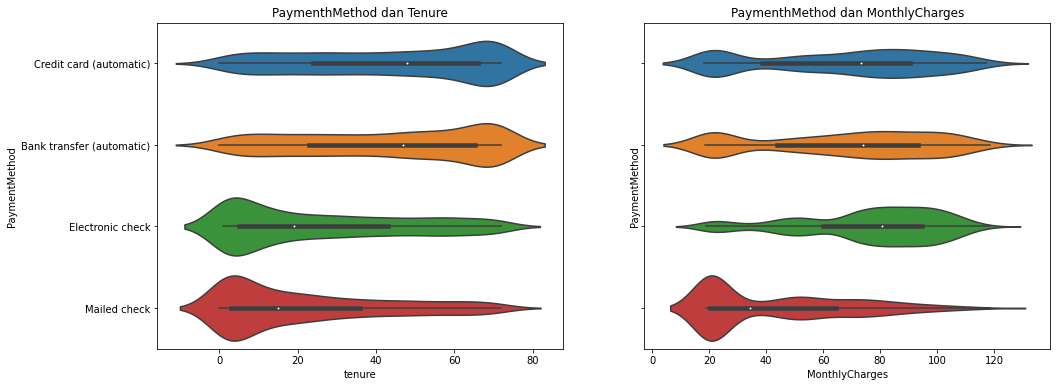

In [ ]:
# fig = sns.violinplot(x="PaymentMethod", y="TotalCharges", hue="Churn", data=df, palette=palette, split=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.violinplot(x="tenure", y="PaymentMethod", data=df, ax=ax1)
ax1.set_title('PaymenthMethod dan Tenure')
sns.violinplot(x="MonthlyCharges", y="PaymentMethod", data=df, ax=ax2)
ax2.set_title('PaymenthMethod dan MonthlyCharges')
plt.show()

Cek Elektronik mendapatkan pemasukan kebanyakan dari `MonthlyCharges` yang tinggi di kisaran \$64 - \$106. Sepertinya **banyak peluang pemasukan bulanan yang tinggi dan terbuang** begitu saja dari metode pembayaran ini. 

Metode pembayaran `CreditCard` dan `Bank Transfer` hampir sama. Memberikan kontribusi pemasukan bulanan di kisaran \$5 - \$31 dan \$57 - \$109, juga mereka terbilang konsisten menyumbang segitu karena bisa mempertahankan pelanggan. Berbeda dengan `Mailed Check`, pemasukan bulanan yang dikontribusikan paling sedikit. Juga metode pembayaran tersebut jika dilihat pada garis plot sebelumnya, banyak tidak mempertahankan pelanggan.

<h3> Korelasi Antar Kolom Numerik </h3>

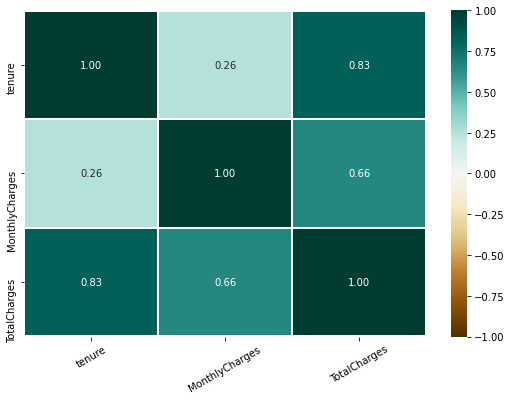

In [ ]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , cmap="BrBG", fmt = '.2f', vmin=-1, vmax=1, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30) 
plt.show()

# Data Pre-Processing

In [ ]:
# Mengubah nilai 'Yes' menjadi 1 dan 'No' menjadi 0
encColumn = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
df[encColumn] = df[encColumn].replace({'No': 0, 'Yes': 1})

# Mengubah gender laki-laki (male) menjadi 1 dan perempuan (female) menjadi 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

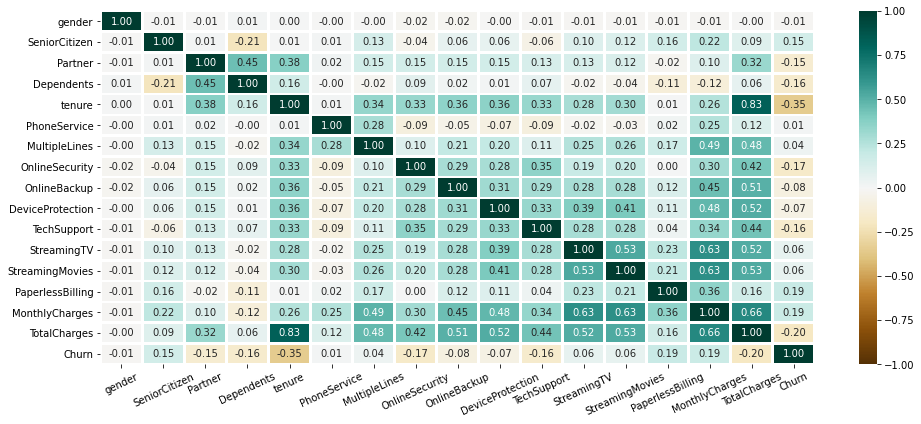

In [ ]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(16, 6.5))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f', cmap="BrBG", vmin=-1, vmax=1, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25) 
plt.show()

In [ ]:
X = df[['Partner', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges']]
y = df['Churn']
X = pd.get_dummies(X)

Ini merupakan data yang tidak terdistribusi Normal. Maka kami me-Normalisasikan data `tenure` dan `MonthlyCharges` menggunakan *MinMaxScaler* menjadi skala 0 sampai 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
X = pd.DataFrame(MM.fit_transform(X), columns=X.columns)
X.head()

,Partner,tenure,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,1.000000,0.058209,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.611111,0.695522,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.527778,0.564179,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.055556,0.374627,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.027778,0.350249,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

Untuk mendapatkan parameter-parameter terbaik pada Algoritma Model, kami menggunakan `GridSearchCV`. 

In [ ]:
param = {'Model 1': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': range(100, 800, 100)}, 
         'Model 2': {'max_depth': range(2, 8)}, 
         'Model 3': {'n_estimators': range(30, 45), 'max_depth': range(2, 8)}}

Model1 = GridSearchCV(LogisticRegression(), param['Model 1'])
Model2 = GridSearchCV(DecisionTreeClassifier(), param['Model 2'])
Model3 = GridSearchCV(RandomForestClassifier(), param['Model 3'])
Model4 = GaussianNB()

allClf = [Model1, Model2, Model3, Model4]

In [ ]:
for id, clf in enumerate(allClf):
    print(f'Model{id+1} ==================================================')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_eval)
    print(classification_report(y_eval, y_pred))
    try:
        print('Best Parameter:', clf.best_params_)
    except:
        pass
    print()

Model1 ==================================================
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1468
           1       0.65      0.45      0.53       508

    accuracy                           0.80      1976
   macro avg       0.74      0.68      0.70      1976
weighted avg       0.78      0.80      0.78      1976

Best Parameter: {'C': 0.1, 'max_iter': 100}

Model2 ==================================================
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1468
           1       0.63      0.47      0.54       508

    accuracy                           0.79      1976
   macro avg       0.73      0.69      0.70      1976
weighted avg       0.78      0.79      0.78      1976

Best Parameter: {'max_depth': 4}

Model3 ==================================================
              precision    recall  f1-score   support

           0       0.84      0.90     

Kami sudah mencoba menggunakan SMOTE-NC untuk mengatasi data Churn yang kurang seimbang. Namun, akhirnya kami tidak menggunakan SMOTE, hasil laporan prediksi model yang didapatkan lebih baik tanpa di SMOTE.

# Referensi

https://www.kaggle.com/ash316/eda-to-prediction-dietanic <br>
https://www.kaggle.com/gcmadhan/classification-with-80-accuracy <br>
https://mode.com/blog/violin-plot-examples/ <br>
https://medium.com/@ksnugroho/confusion-matrix-untuk-evaluasi-model-pada-unsupervised-machine-learning-bc4b1ae9ae3f <br>